# Exercise 1

The **aims** of this exercise are:

*   Allow you practice slicing and analysing data with Pandas
*   Introduce you to the MovieLens dataset
*   Demonstrate use of Pandas to perform non-personalised and personalised recommendations

This exercise is worth 5% of the contribution to your final mark for RecSys, and is expected to take approximately 5-7 hours of your time. NB: This is an individual exercise.



In [ ]:
#Standard setup
import pandas as pd
import numpy as np

#Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

**Hint** : If you are using Colab, it might be good if you open these files, either on your own machine, or using Colab's inbuilt CSV viewer (via folder icon on the left hand sidebar). The CSV files are small enough to be searched using your favourite editor.

In [ ]:
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0  4402k      0 --:--:-- --:--:-- --:--:-- 4402k
Archive:  ml-latest-small.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Let's look into the files using Pandas:

In [ ]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [ ]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes, e.g.

 * project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [ ]:
movies_df["title"]

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [ ]:
movies_df[["movieId", "title"]]

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)
...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017)
9738,m193583,No Game No Life: Zero (2017)
9739,m193585,Flint (2017)
9740,m193587,Bungo Stray Dogs: Dead Apple (2018)


 - Select rows based on one or more conditions

In [ ]:
ratings_df[(ratings_df["userId"] == 'u500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp
79908,u500,m11,1.0,1005528017
79909,u500,m39,1.0,1005527926
79910,u500,m101,1.0,1005527980
79915,u500,m231,1.0,1005528039
79923,u500,m449,1.0,1005528017
79924,u500,m471,1.0,1005528017
79926,u500,m539,1.0,1005527980
79931,u500,m597,1.0,1005527980
79934,u500,m745,1.0,1005528205
79939,u500,m1188,1.0,1005528065


In [ ]:
#printing columns of movies dataframe
movies_df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
#printing columns of ratings dataframe
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')



Lets practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions:

## Task 1. How many users are there in this dataset?


In [ ]:
# add your solution here

#Counting the unique userIds will give number of users in dataset

user_count = ratings_df['userId'].nunique()
print("No. of users in Dataset : ", user_count)

No. of users in Dataset :  610


## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

Hint: Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the ratings_df dataframe. [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.


In [ ]:
#grouping the ratings_df dataframe  on userId
grouped_userId = ratings_df.groupby(['userId'])

In [ ]:
# add your solutions here

#averaging each user rating and storing in 'average user rating' column
each_user_average_rating = grouped_userId['rating'].agg([np.mean]).reset_index().rename(columns={"userId" : "userId","mean" : "average user rating"})
each_user_average_rating

,userId,average user rating
0,u1,4.366379
1,u10,3.278571
2,u100,3.945946
3,u101,3.557377
4,u102,3.357143
...,...,...
605,u95,4.062500
606,u96,3.884615
607,u97,4.194444
608,u98,3.913043


In [ ]:
print(round(each_user_average_rating[each_user_average_rating["userId"]=='u10']['average user rating'],2))
print(round(each_user_average_rating[each_user_average_rating["userId"]=='u200']['average user rating'],2))

1    3.28
Name: average user rating, dtype: float64
113    3.81
Name: average user rating, dtype: float64


## Task 3. What is the average number of ratings per-user? 

In contrast to Task 2, the solution is a single number.

Many solutions will involve [GroupBy.count()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation).

In [ ]:
# add your solution here

#Counting each user's rating and storing in 'number of ratings' column
each_user_rating_count = grouped_userId['rating'].count().reset_index().rename(columns={"userId" : "userId", "rating" : "Number of ratings"})

#calculating average from each user's number of rating
average_number_ratings_user = each_user_rating_count['Number of ratings'].mean()
print("Average number of ratings per-user : ", round(average_number_ratings_user,2))

Average number of ratings per-user :  165.3


## Analysing users's preferences.

Lets try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Lets do this for userId 556.


In [ ]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


This user is pretty into adventure/fantasies. 

NB: If the columns we are joining on dont have the same name, we can specify `left_on` and `right_on` attributes. See also the  [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) documentation.

## Task 4. Analysing movie categories

Lets examine two particular users a bit more, u556 and u7.

 - How many movies with "Fantasy" genre have u7 rated positively ($\geq 4$)? 

 - How many movies with "Fantasy" genre have u556 rated positively ($\geq 4$)? 

 - What percentage of ALL of u556's ratings are positive ratings ($\geq 4$)  AND for movies belonging to the "Fantasy" genre?

Hints:
 - Pandas Series has a useful `str.contains()` function:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
 - Pandas dataframes respond to `len()` as you would expect.

In [ ]:
# add your solution here

# movies with "Fantasy" genre, u7 rated positively ( ≥4 )
u7 = pd.merge(
    ratings_df[(ratings_df["userId"]=='u7') & (ratings_df["rating"] >= 4.0) ], 
    movies_df[movies_df["genres"].str.contains('Fantasy')],
    on=["movieId"]).sort_values(by="rating", ascending=False)

# movies with "Fantasy" genre, u556 rated positively ( ≥4 )
u556 = pd.merge(
    ratings_df[(ratings_df["userId"]=='u556') & (ratings_df["rating"] >= 4.0) ], 
    movies_df[movies_df["genres"].str.contains('Fantasy')],
    on=["movieId"]).sort_values(by="rating", ascending=False)

# number of ratings given by u556
u556_all_ratings =  ratings_df[ratings_df["userId"]=='u556']['rating'].count()

#percentage of ALL of u556's ratings are positive ratings ( ≥4 ) AND for movies belonging to the "Fantasy" genre
ratio_556 = (len(u556) / u556_all_ratings ) 

print("Number of Fantasy genre movie rated positively by following users - ")
print("1) u7 : ",len(u7))
print("2) u556 :",len(u556))
print("3) Percentage of u556 positive reviews for fantasy genre : ", round(ratio_556,2))

Number of Fantasy genre movie rated positively by following users - 
1) u7 :  11
2) u556 : 22
3) Percentage of u556 positive reviews for fantasy genre :  0.69


# Part B. Popularity-based Recomendation

Now lets examine the ratings of movies. 

We can get a dataframe containing the number of times a movie has been rated by applying a groupby and aggregation of the ratings_df.


In [ ]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25]

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


##Task 5. Plot the distribution of movie ratings.

Use Matplotlib's histogram function to plot the distribution of movie ratings from the `groupingCountSeries` dataframe. This will produce a bar chart with 'binned' counts.

Hints: 
- apply a logarithmic scale for the y-axis, using matplotlib's `log=True` option.
- Allow matplotlib to use its default number of bins (which is 10).
- Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

You will need to analyse this graph in the quiz.

[]

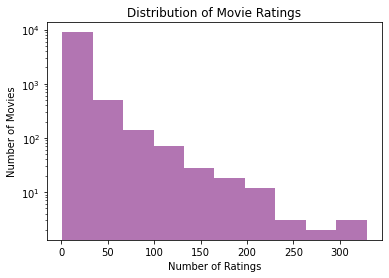

In [ ]:
# add your solution here
import matplotlib.pyplot as plt

plt.hist(groupingCountSeries['rating'], log = True, color = (0.5,0.1,0.5,0.6))
plt.title('Distribution of Movie Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.savefig('task5.png')
plt.plot()


## Task 6. Find the names of *all* of the movies that have the highest *average* ratings?

You should return a dataframe containing the ids and names of the movies, their average ratings, and the number of ratings. NB: You may need to analyse this dataframe further to answer the questions in the quiz.

Hints:
 - Try a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Once you have a Series with columns [movieId, meanRating], identify the highest value of meanRating. You can then merge this with the movies_df.
 - If the column we are trying to merge on is an index, we can use  `left_index=True` or `right_index=True` in the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).


In [ ]:
# add your solution here

grouped_movieId = ratings_df.groupby(['movieId'])

#averaging each movie rating and storing in 'average rating' column
each_movie_average_rating = grouped_movieId['rating'].agg([np.mean]).reset_index().rename(columns={"movieId" : "movieId","mean" : "Average Rating"})

#highest value of average Rating
high_rating = each_movie_average_rating['Average Rating'].max()

#Counting each movie's rating and storing in 'Number of ratings' column
each_movie_rating_count = ratings_df.groupby(['movieId'])['rating'].count().reset_index().rename(columns={"movieId" : "movieId", "rating" : "Number of ratings"})

#temp2 containing the ids and names of the movies, their average ratings, and the number of ratings
temp = pd.merge(
    movies_df,
    each_movie_average_rating,
    left_index = True,
    on=["movieId"])

temp2 = pd.merge(
    temp,
    each_movie_rating_count,
    left_index = True,
    on=["movieId"])

#all of the movies that have the highest average ratings
movie_highest_avg_ratings = temp2[temp2['Average Rating'] == high_rating]
movie_highest_avg_ratings

,movieId,title,genres,Average Rating,Number of ratings
6177,m53,Lamerica (1994),Adventure|Drama,5.0,2
9687,m99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0,2
1479,m148,"Awfully Big Adventure, An (1995)",Drama,5.0,1
5509,m467,Live Nude Girls (1995),Comedy,5.0,1
5829,m495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0,1
...,...,...,...,...,...
2147,m176601,Black Mirror,(no genres listed),5.0,1
2183,m179133,Loving Vincent (2017),Animation|Crime|Drama,5.0,1
2184,m179135,Blue Planet II (2017),Documentary,5.0,1
2273,m184245,De platte jungle (1978),Documentary,5.0,1


You can nosw answer the question in the quiz for Task 6, based on your  observations on analysing this table?

In [ ]:
movie_highest_avg_ratings[movie_highest_avg_ratings['movieId'] == 'm6442']

,movieId,title,genres,Average Rating,Number of ratings
7301,m6442,Belle époque (1992),Comedy|Romance,5.0,2


In [ ]:
print(len(movie_highest_avg_ratings))

296


# Part C - Association Rules and Lift

I think we can do better than simply examining movie popularity. 

Lets take all of the positive ratings (4 or 5), and find the most popular pairs of movies that users have watched.

There is a lot going on there, so please take the time to break it down to understand what it does.

NB: In this code, we perform a "self-join" on a dataframe. If this is unfamiliar, you can read more at:
 - https://dfrieds.com/data-analysis/self-join-python-pandas.html
 - https://www.w3schools.com/sql/sql_join_self.asp



In [ ]:
positives = ratings_df[ratings_df["rating"]>=4]

#join positives with itself on userId to get all pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])

#we only want A->B, not B->A. Use the timestamps to restrict the selected pairs
sequences = pairs[pairs["timestamp_x"] < pairs["timestamp_y"]] 

#lets count the frequency of each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

#sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

#display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1574483,m318,m356,104
1416644,m296,m593,92
1416033,m296,m47,91
1187221,m260,m1196,91
1575263,m318,m527,90


## Task 7. Display the titles of the (most popular) movie pairs from `pairswithcounts`?

You will need to analyse this dataframe to complete questions in the quiz.

Hint:
 - you will need to re-sort after a pd.merge()

In [ ]:

temp = pairswithcounts.merge( right = movies_df[['movieId','title']], left_on= 'movieId_x', right_on='movieId')
temp2 = temp.merge( right = movies_df[['movieId','title']], left_on= 'movieId_y', right_on='movieId') 
temp3 = temp2.loc[: , ~ temp2.columns.duplicated()]
pairs_with_titles = temp3.sort_values(['count'], ascending=False)

pairs_with_titles

In [ ]:
# add your solution here

# merging title for movieId_x column and storing in temp
temp = pairswithcounts.merge( right = movies_df[['movieId','title']], left_on= 'movieId_x', right_on='movieId')

# merging title for movieId_y column and storing in temp2
temp2 = temp.merge( right = movies_df[['movieId','title']], left_on= 'movieId_y', right_on='movieId')

#dropping duplicate columns  
temp3 = temp2.loc[: , ~ temp2.columns.duplicated()]

#sorting according to most popular movie pairs
pairs_with_titles = temp3.sort_values(['count'], ascending=False)

pairs_with_titles

,movieId_x,movieId_y,count,title_x,title_y
0,m318,m356,104,"Shawshank Redemption, The (1994)",Forrest Gump (1994)
5993,m296,m593,92,Pulp Fiction (1994),"Silence of the Lambs, The (1991)"
22257,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back...
17759,m296,m47,91,Pulp Fiction (1994),Seven (a.k.a. Se7en) (1995)
2122,m318,m527,90,"Shawshank Redemption, The (1994)",Schindler's List (1993)
...,...,...,...,...,...
1515989,m2077,m4865,1,"Journey of Natty Gann, The (1985)",From Hell (2001)
1515990,m213,m4865,1,Burnt by the Sun (Utomlyonnye solntsem) (1994),From Hell (2001)
1515991,m6985,m4865,1,"Passion of Joan of Arc, The (Passion de Jeanne...",From Hell (2001)
1515992,m1785,m4865,1,King of New York (1990),From Hell (2001)


In [ ]:
x = pairs_with_titles[pairs_with_titles['count'] == 74]
x

,movieId_x,movieId_y,count,title_x,title_y
78329,m858,m1221,74,"Godfather, The (1972)","Godfather: Part II, The (1974)"


## Task 8. Calculate Lift (see Lecture 3) for all pairs in `pairwithcounts`.  

Your target dataframe should have columns: 
 - movieId_x	movieId_y	
 - count - count of movies x & y occurring in a profile	
 - ratingCount_x	ratingCount_y	- how many times these movies appeared in total.
 - lift	- your calculated lift.
 - title_x, title_y, genre_x and genre_y - metadata about the films, so you know if you have success. 

Hints: 
 - You will need to join pairswithcounts with a dataframe containing rating counts of individual movies. A calculated column will be needed. See https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html or https://stackoverflow.com/a/12377083/9989050 for hints on how to achieve that.
 - My solution had duplicated columns. I used this trick https://stackoverflow.com/a/40435354/9989050 to get rid of them.
 - It might be useful to [sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) your dataframe.

Below I provide the highest lift movies for you to check your solution.


In [ ]:
#add your solution here

#Counting each movie's rating and storing in 'rating count' column
each_movie_rating_count = positives.groupby(['movieId'])['rating'].count().reset_index().rename(columns={"movieId" : "movieId", "rating" : "ratingCount"})

#merging rating counts for both movie_x and movie_y column
temp = pairs_with_titles.merge( right = each_movie_rating_count[['movieId', 'ratingCount']], left_on= 'movieId_x', right_on='movieId')
pairs_with_ratings = temp.merge( right = each_movie_rating_count[['movieId', 'ratingCount']], left_on= 'movieId_y', right_on='movieId')

#dropping duplicate columns
pairs_with_ratings = pairs_with_ratings.loc[: , ~ pairs_with_ratings.columns.duplicated()]

#Calculating lift
pairs_with_ratings['ratingCount_x_ratingCount_y'] = pairs_with_ratings['ratingCount_x'] * pairs_with_ratings['ratingCount_y']
pairs_with_ratings['lift'] = (pairs_with_ratings['count'] * len(ratings_df) )/ pairs_with_ratings['ratingCount_x_ratingCount_y']

# merging genre for both movie_x and movie_y column
temp = pairs_with_ratings.merge( right = movies_df[['movieId','genres']], left_on= 'movieId_x', right_on='movieId')
temp2 = temp.merge( right = movies_df[['movieId','genres']], left_on= 'movieId_y', right_on='movieId')

#dropping duplicate columns  
pairs_with_lift = temp2.loc[: , ~ temp2.columns.duplicated()]

#sorting based on lift column, highest value appearing first
pairs_with_lift = pairs_with_lift.sort_values(['lift'], ascending=False)

pairs_with_lift

,movieId_x,movieId_y,count,title_x,title_y,ratingCount_x,ratingCount_y,ratingCount_x_ratingCount_y,lift,genres_x,genres_y
3533035,m43836,m1703,1,"Pink Panther, The (2006)",For Richer or Poorer (1997),1,1,1,100836.000000,Adventure|Comedy|Crime,Comedy
2696109,m121374,m160289,1,Bill Burr: Why Do I Do This? (2008),O.J.: Made in America (2016),1,1,1,100836.000000,Comedy,Documentary
2696111,m121372,m160289,1,Bill Burr: Let It Go (2010),O.J.: Made in America (2016),1,1,1,100836.000000,Comedy,Documentary
2696112,m119153,m160289,1,Bill Burr: You People Are All the Same (2012),O.J.: Made in America (2016),1,1,1,100836.000000,Comedy,Documentary
2696113,m118930,m160289,1,Bill Burr: I'm Sorry You Feel That Way (2014),O.J.: Made in America (2016),1,1,1,100836.000000,Comedy,Documentary
...,...,...,...,...,...,...,...,...,...,...,...
10931,m329,m296,1,Star Trek: Generations (1994),Pulp Fiction (1994),42,244,10248,9.839578,Adventure|Drama|Sci-Fi,Comedy|Crime|Drama|Thriller
1161359,m2959,m349,1,Fight Club (1999),Clear and Present Danger (1994),179,58,10382,9.712579,Action|Crime|Drama|Thriller,Action|Crime|Drama|Thriller
3114739,m80463,m318,1,"Social Network, The (2010)","Shawshank Redemption, The (1994)",38,274,10412,9.684595,Drama,Crime|Drama
15603,m454,m2571,1,"Firm, The (1993)","Matrix, The (1999)",48,222,10656,9.462838,Drama|Thriller,Action|Sci-Fi|Thriller


If your solution is correct, you will see the highest lift movie pairs. 
Lets check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy). 

It should be clear that these lift pairs do not have high support. 

In [ ]:
#movieId_x = m1475, movieId_y= m2024?
result_8[(result_8['movieId_x'] == 'm1475') & (result_8['movieId_y'] == 'm2024')]

,movieId_x,movieId_y,count,title_x,title_y,ratingCount_x,ratingCount_y,ratingCount_x_ratingCount_y,lift,genres_x,genres_y
3239968,m1475,m2024,1,Kama Sutra: A Tale of Love (1996),"Rapture, The (1991)",1,1,1,100836.0,Romance,Drama|Mystery


In [ ]:
#movieId_x = m91500, movieId_y = m106487
round(pairs_with_lift[(pairs_with_lift['movieId_x'] == 'm91500') & (pairs_with_lift['movieId_y'] == 'm106487')]['lift'] , 2)

1041321    3001.07
Name: lift, dtype: float64

## Task 9 - Support Thresholds

Removing movie pairs with support count $< 10$.

I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing! 

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

Keep this dataframe around - you will need it to answer the questions for Task 9 in the quiz.

In [ ]:
# add your solution here
# removing pairs with count < 10
support_threshlods_10 = pairs_with_lift[pairs_with_lift['count'] >= 10].sort_values(['lift'], ascending=False)
support_threshlods_10

,movieId_x,movieId_y,count,title_x,title_y,ratingCount_x,ratingCount_y,ratingCount_x_ratingCount_y,lift,genres_x,genres_y
1006647,m91500,m116823,11,The Hunger Games (2012),The Hunger Games: Mockingjay - Part 1 (2014),24,15,360,3081.100000,Action|Adventure|Drama|Sci-Fi|Thriller,Adventure|Sci-Fi|Thriller
1041321,m91500,m106487,10,The Hunger Games (2012),The Hunger Games: Catching Fire (2013),24,14,336,3001.071429,Action|Adventure|Drama|Sci-Fi|Thriller,Action|Adventure|Sci-Fi|IMAX
582789,m115713,m139385,10,Ex Machina (2015),The Revenant (2015),20,19,380,2653.578947,Drama|Sci-Fi|Thriller,Adventure|Drama
789976,m91658,m67255,10,"Girl with the Dragon Tattoo, The (2011)","Girl with the Dragon Tattoo, The (Män som hata...",24,19,456,2211.315789,Drama|Thriller,Crime|Drama|Mystery|Thriller
869077,m34162,m8807,10,Wedding Crashers (2005),Harold and Kumar Go to White Castle (2004),25,19,475,2122.863158,Comedy|Romance,Adventure|Comedy
...,...,...,...,...,...,...,...,...,...,...,...
15371,m457,m2571,13,"Fugitive, The (1993)","Matrix, The (1999)",137,222,30414,43.100809,Thriller,Action|Sci-Fi|Thriller
3114552,m1206,m318,10,"Clockwork Orange, A (1971)","Shawshank Redemption, The (1994)",86,274,23564,42.792395,Crime|Drama|Sci-Fi|Thriller,Crime|Drama
3114541,m364,m318,13,"Lion King, The (1994)","Shawshank Redemption, The (1994)",115,274,31510,41.601650,Adventure|Animation|Children|Drama|Musical|IMAX,Crime|Drama
10757,m457,m296,13,"Fugitive, The (1993)",Pulp Fiction (1994),137,244,33428,39.214670,Thriller,Comedy|Crime|Drama|Thriller


In [ ]:
final_result[(final_result['movieId_x'] == 'm110') | (final_result['movieId_y'] == 'm110')]

,movieId_x,movieId_y,count,title_x,title_y,ratingCount_x,ratingCount_y,ratingCount_x_ratingCount_y,lift,genres_x,genres_y
1286160,m110,m2403,12,Braveheart (1995),First Blood (Rambo: First Blood) (1982),166,14,2324,520.667814,Action|Drama|War,Action|Adventure|Drama|Thriller
754396,m110,m151,18,Braveheart (1995),Rob Roy (1995),166,22,3652,497.001095,Action|Drama|War,Action|Drama|Romance|War
842860,m110,m5630,10,Braveheart (1995),Red Dragon (2002),166,15,2490,404.963855,Action|Drama|War,Crime|Mystery|Thriller
475464,m110,m266,20,Braveheart (1995),Legends of the Fall (1994),166,31,5146,391.900505,Action|Drama|War,Drama|Romance|War|Western
1171536,m110,m552,12,Braveheart (1995),"Three Musketeers, The (1993)",166,19,3154,383.649968,Action|Drama|War,Action|Adventure|Comedy|Romance
...,...,...,...,...,...,...,...,...,...,...,...
4202,m1136,m110,11,Monty Python and the Holy Grail (1975),Braveheart (1995),101,166,16766,66.157462,Adventure|Comedy|Fantasy,Action|Drama|War
4206,m4306,m110,12,Shrek (2001),Braveheart (1995),114,166,18924,63.941661,Adventure|Animation|Children|Comedy|Fantasy|Ro...,Action|Drama|War
4240,m1265,m110,10,Groundhog Day (1993),Braveheart (1995),97,166,16102,62.623277,Comedy|Fantasy|Romance,Action|Drama|War
4199,m1214,m110,10,Alien (1979),Braveheart (1995),110,166,18260,55.222344,Horror|Sci-Fi,Action|Drama|War


In [ ]:
round(final_result[(final_result['movieId_x'] == 'm364') & (final_result['movieId_y'] == 'm362')]['lift'] , 2)


939739    515.79
Name: lift, dtype: float64

# End of Exercise

As part of your submission, you should complete the Exercise 1 quiz on Moodle.
You will need to upload your notebook, complete with the **results** of executing the code.